# Task 2

$\newcommand{\argmin}{\mathop{\mathrm{argmin}}\limits}$
$\newcommand{\argmax}{\mathop{\mathrm{argmax}}\limits}$

$$ \hat f_t \leftarrow \hat f_{t-1} + \rho_th(x, \theta_t) \\ $$

$$ g_t(x)=-\E_y\left[ \frac{\partial \Psi(y, f(x))}{\partial f(x)} \vert x \right]_{f(x)=\hat f^{t-1}(x)}$$

$$ (\rho_t, \theta_t) = \argmin_{\rho, \theta}\sum_{i=1}^{N}[g_t(x_i)-\rho h(x_i, \theta)]^2$$

$$ \Psi(y, f)_{Bern} = \log(1 + \exp(-2(2y-1)f)) \leftarrow label = \{1, 0\}$$ 

Из лекции:

$$ L(h) = \sum_{i=1}^N log(1+\exp(-2y_ih(x_i))$$


### Imports
Import libraries and write settings here.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from IPython import get_ipython

ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%matplotlib inline

### import data

In [2]:
data1 = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                    delim_whitespace=True, header=None,
                    names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                           'model', 'origin', 'car_name'])
data1 = data1.dropna()
data1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [3]:
columns1 = ['cylinders', 'displacement', 'horsepower',
            'weight', 'acceleration', 'model', 'origin']
X1 = np.array(data1[columns1])
y1 = np.array(data1['mpg'])
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4)

In [4]:
%%time
tree = DecisionTreeRegressor()
tree.fit(X1_train, y1_train)
mse = mean_squared_error(y1_test, tree.predict(X1_test))
print(mse)

11.108216560509556
Wall time: 2.95 ms


In [5]:
data2 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data",
                    header=None,
                    names=['vendor name', 'Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH',
                           'CHMIN', 'CHMAX', 'PRP', 'ERP'])
data2 = data2.dropna()
data2.head()

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [6]:
columns2 = ['MYCT', 'MMIN', 'MMAX', 'CACH',
                            'PRP', 'CHMAX', 'ERP']
X2 = np.array(data2[columns2])
y2 = np.array(data2['CHMIN'])
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1)

In [7]:
%%time
tree = DecisionTreeRegressor()
tree.fit(X2_train, y2_train)
mse = mean_squared_error(y2_test, tree.predict(X2_test))
print(mse)

4.380952380952381
Wall time: 962 µs


In [8]:
from sklearn.datasets import load_svmlight_file, load_svmlight_file
x_train, y_reg_train = load_svmlight_file("reg.train.txt")
x_reg_train = x_train.toarray()

x_test, y_reg_test = load_svmlight_file("reg.test.txt")
x_reg_test = x_test.toarray()

In [9]:
%%time
tree = DecisionTreeRegressor(max_depth=3, max_features=None)
tree.fit(x_reg_train, y_reg_train)
mse = mean_squared_error(y_reg_test, tree.predict(x_reg_test))
print(mse)

0.8695703931003984
Wall time: 165 ms


In [10]:
data_train = pd.read_csv("spam.train.txt", header=None, sep=' ')
x_spam_train, y_spam_train = np.array(
    data_train[range(1, 103)]), np.array(data_train[0])

data_test = pd.read_csv("spam.test.txt", header=None, sep=' ')
x_spam_test, y_spam_test = np.array(
    data_test[range(1, 103)]), np.array(data_test[0])

In [11]:
%%time
tree = DecisionTreeClassifier()
tree.fit(x_spam_train, y_spam_train)
f1 = f1_score(y_spam_test, tree.predict(x_spam_test))
print(f1)

0.8658707396785166
Wall time: 420 ms


## MyDecisionTreeRegressor

In [31]:
class MyDecisionTreeRegressor:
    NON_LEAF_TYPE = False
    LEAF_TYPE = True

    def __init__(self, min_samples_split=3, max_depth=None, min_impurity_split=1e-7, max_features=None):
        self.tree = dict()
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.min_impurity_split = min_impurity_split

        if max_features == 'sqrt':
            self.get_feature_ids = self.__get_feature_ids_sqrt
        elif max_features == 'log2':
            self.get_feature_ids = self.__get_feature_ids_log2
        elif max_features == None:
            self.get_feature_ids = self.__get_feature_ids_N
        else:
            print('invalid max_features name')
            raise

    def __get_feature_ids_sqrt(self, n_feature):
        feature_ids = np.arange(n_feature)
        np.random.shuffle(feature_ids)
        return np.array(feature_ids[:int(np.sqrt(n_feature))])

    def __get_feature_ids_log2(self, n_feature):
        feature_ids = np.arange(n_feature)
        np.random.shuffle(feature_ids)
        return np.array(feature_ids[:int(np.log2(n_feature))])

    def __get_feature_ids_N(self, n_feature):
        return np.arange(n_feature)

    def __calc_variance(self, y, w):
        if w is not None:
            y = y.astype(np.float64, copy=False)
            w = np.asarray(w)
            y = (y.T * w.T).T
        N = y.shape[1]
        share_l = np.arange(1, N)
        share_r = N - share_l
        y_sq = y ** 2
        sum_sq_l = (y_sq[:, :N-1]).cumsum(1)
        sum_sq_r = y_sq.sum(1, keepdims=True) - sum_sq_l
        mean_sq_l = sum_sq_l / share_l
        mean_sq_r = sum_sq_r / share_r
        sum_l = (y[:, :N-1]).cumsum(1)
        sum_r = y.sum(1, keepdims=True) - sum_l
        mean_l = sum_l / share_l
        mean_r = sum_r / share_r
        cum_std_l = mean_sq_l - mean_l ** 2
        cum_std_r = mean_sq_r - mean_r ** 2
        variance = (share_l / N) * cum_std_l + (share_r / N) * cum_std_r
        return variance

    def __calc_border_inds(self, x):
        diff = np.abs(np.diff(x, axis=0).T)
        inds = np.argwhere(diff > 1e-5)
        border_inds = []
        for i in range(x.shape[1]):
            ids = inds[inds[:, 0] == i][:, 1]
            if ids.shape[0] == 0:
                ids = np.array([np.inf])
            border_inds.append(ids)
        return border_inds

    def __sort_samples(self, x, y,w, feature_ids):
        sorted_ids = x[:, feature_ids].argsort(axis=0)
        if w is not None:
            return x[sorted_ids, feature_ids], y[sorted_ids].T, w[sorted_ids].T
        else:
            return x[sorted_ids, feature_ids], y[sorted_ids].T, None

    def __find_threshold(self, x, y, w, feature_ids):
        x_sort, y_sort, w_sort = self.__sort_samples(x, y, w, feature_ids)
        border_inds = self.__calc_border_inds(x_sort)
        variance = self.__calc_variance(y_sort, w_sort)
        min_variance_ind = []
        min_variance_no_ind = []
        for feature_ind, border_ind in enumerate(border_inds):
            if border_ind[0] == np.inf:
                min_variance_ind.append(0)
                min_variance_no_ind.append(len(min_variance_ind)-1)
            else:
                idx = np.argmin(variance[feature_ind, border_ind])
                min_variance_ind.append(border_ind[idx])
        min_variance_ind = np.array(min_variance_ind)
        min_variance_no_ind = np.array(min_variance_no_ind)
        min_variance = variance[np.arange(variance.shape[0]), min_variance_ind.ravel()]
        if min_variance_no_ind.shape[0] > 0:
            min_variance[min_variance_no_ind] = np.inf

        best_split_right_ind = min_variance_ind + 1
        min_variance[best_split_right_ind <= self.min_samples_split] = np.inf
        min_variance[best_split_right_ind >=
                     y_sort.shape[1] - self.min_samples_split] = np.inf
        best_threshold = (x_sort[min_variance_ind, np.arange(x_sort.shape[1])]
                          + x_sort[best_split_right_ind, np.arange(x_sort.shape[1])]) / 2.0
        return min_variance, best_threshold

    def __set_leaf(self, x, y, node_id, w):
        if w is not None:
            y = y.astype(np.float64, copy=False)
            w = np.asarray(w)
            numerator = np.sum(w * y)
            denominator = w.sum()
            if abs(denominator) < 1e-30:
                mean_value =  0
            else:
                mean_value = numerator / denominator
        else:
            mean_value = y.mean()
        self.tree[node_id] = {'type': self.LEAF_TYPE,
                              'value': mean_value}

    def __is_leaf(self, x, y, depth):
        return x.shape[0] < 2 * self.min_samples_split + 2 or np.unique(y).shape[0] == 1 or \
            self.max_depth is not None and depth >= self.max_depth or \
            self.min_impurity_split is not None and np.mean((y - y.mean()) ** 2) < self.min_impurity_split

    def __div_samples(self, x, y, w, feature_id, threshold):
        left_mask = x[:, feature_id] > threshold
        right_mask = ~left_mask
        if w is not None:
            return x[left_mask], x[right_mask], y[left_mask], y[right_mask], w[left_mask], w[right_mask]
        else:
            return x[left_mask], x[right_mask], y[left_mask], y[right_mask], None, None

    def __fit_node(self, node_id, depth, x, y, w):
        if self.__is_leaf(x, y, depth):
            self.__set_leaf(x, y, node_id, w)
            return self

        feature_ids = self.get_feature_ids(x.shape[1])
        variance, thresholds = self.__find_threshold(x, y, w, feature_ids)
        best_variance_inds = variance.argmin()
        best_variance = variance[best_variance_inds]
        best_id = feature_ids[best_variance_inds]
        best_threshold = thresholds[best_variance_inds]

        if best_variance == np.inf:
            self.__set_leaf(x, y, node_id,w)
            return self
        else:
            x_l, x_r, y_l, y_r, w_l, w_r = self.__div_samples(
                x, y, w, best_id, best_threshold)
            if x_l.shape[0] == 0 or x_r.shape[0] == 0:
                self.__set_leaf(x, y, node_id, w)
                return self
            else:
                self.tree[node_id] = {'type': self.NON_LEAF_TYPE,
                                      'feature_id': best_id,
                                      'threshold': best_threshold}
        args = [(2 * node_id + 1, depth + 1, x_l, y_l, w_l), (2 * node_id + 2, depth + 1, x_r, y_r, w_r)]
        res = Parallel(n_jobs=-1)(delayed(self.__fit_node)(*args[i]) for i in range(2))
        for t in res:
            self.tree.update(t.tree)
        return self

    def fit(self, x, y, sample_weight=None):
        if sample_weight is not None:
            self.sample_weight = np.asarray(sample_weight)
        else:
            self.sample_weight=None
        self.__fit_node(0, 0, x, y, self.sample_weight)
        return self

    def __predict_value(self, x):
        node_id = 0
        node = self.tree[node_id]
        while node['type'] == self.NON_LEAF_TYPE:
            feature_id, threshold = node['feature_id'], node['threshold']
            if x[feature_id] > threshold:
                node_id = 2 * node_id + 1
            else:
                node_id = 2 * node_id + 2
            node = self.tree[node_id]
        return node['value']

    def predict(self, X):
        return np.array([self.__predict_value(x) for x in X])

    def fit_predict(self, x_train, y_train, predicted_x):
        self.fit(x_train, y_train)
        return self.predict(predicted_x)


In [32]:
%%time
tree = MyDecisionTreeRegressor(max_depth=3)
tree.fit(x_reg_train, y_reg_train)
y_pred = tree.predict(x_reg_test)
mse = mean_squared_error(y_reg_test, y_pred)
print(mse)

0.8694458133509975
Wall time: 1.24 s


In [33]:
%%time
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(x_reg_train, y_reg_train)
y_pred = tree.predict(x_reg_test)
mse = mean_squared_error(y_reg_test, y_pred)
print(mse)

0.8695703931003984
Wall time: 191 ms


In [17]:
y_spam_train = 2 * y_spam_train - 1
y_spam_test = 2 * y_spam_test - 1

## MyGradientBoosting

In [18]:
def bern(y, pred):
    return np.mean(np.logaddexp(0.0, -2.0 * y * pred))

In [98]:
class MyGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.9, max_features=None,
                 min_samples_split=3, min_impurity_split=1e-7, base_tree=MyDecisionTreeRegressor):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.subsample = subsample
        self.learning_rate = learning_rate
        self.min_impurity_split = min_impurity_split
        self.loss_by_iter = []
        self.trees_ = [None] * self.n_estimators
        self.min_samples_split = min_samples_split
        self.base_tree = base_tree

    def _decision_function(self, X, iters=False):
        scores = np.array([self.b[i] * estimator.predict(X) for i, estimator in enumerate(self.trees_)])
        scores_iter = scores.cumsum(0)
        if iters:
            return scores_iter
        return scores_iter[-1]

    def _loss(self, y, y_pred):
        return np.logaddexp(0.0, -2.0 * y * y_pred)

    def _loss_iter(self, y, y_pred):
        return np.mean(self._loss(y, y_pred))

    def _negative_gradient_b(self, y, y_pred, a, b):
        u = np.exp(-2.0 * y * (y_pred + a * b))
        return np.mean(2 * y * a / (1.0 + u))

    def _negative_gradient(self, y, y_pred):
        u = np.exp(-2.0 * y * y_pred)
        return 2.0 * y * u / (1.0 + u)

    def __generate_subsample_mask(self, size):
        ids = np.random.choice(np.arange(size),size=self.subsample_size)
        mask = np.zeros(size).astype(bool)
        mask[ids] = True
        return mask

    def _b(self, X, y, a, y_pred, iters=10):
        b = 1.0
        for i in range(iters):
            b += self._negative_gradient_b(y, y_pred, a, b)
        return b

    def fit(self, X, y):
        self.subsample_size = int(self.subsample * X.shape[0])
        self.b = np.zeros(self.n_estimators, dtype=np.float64)
        self.b[0] = 1.0
        self.trees_[0] = self.base_tree(self.min_samples_split,
                                        self.max_depth)
        self.trees_[0].fit(X, y)
        pred = self.trees_[0].predict(X)
        self.loss_by_iter.append(self._loss_iter(y, pred))
        for i in range(1, self.n_estimators):
            g = self._negative_gradient(y, pred)
            mask = self.__generate_subsample_mask(X.shape[0])
            self.trees_[i] = self.base_tree(self.min_samples_split,
                                            self.max_depth)
            self.trees_[i].fit(X[mask], g[mask])
            new_pred = self.trees_[i].predict(X)
            self.b[i] = self._b(X, y, new_pred, pred)
            pred += self.learning_rate * self.b[i] * new_pred
            self.loss_by_iter.append(self._loss_iter(y[mask], pred[mask]))
        return self

    def predict(self, X, y_true=None):
        scores = self._decision_function(X)
        indices = (scores >= 0).astype(np.int_)
        indices = 2 * indices - 1
        return indices


In [99]:
N_ESTIMATORS = 300

In [100]:
%%time
my_model = MyGradientBoosting(learning_rate=0.1, n_estimators=N_ESTIMATORS, max_depth=3,
                              base_tree=MyDecisionTreeRegressor)
my_model.fit(x_spam_train, y_spam_train)
my_pred = my_model.predict(x_spam_test)
score_my_model = bern(y_spam_test, my_pred)
print(score_my_model)

0.2818603897223679
Wall time: 2min 2s


## Sklearn GradientBoosting

In [101]:
%%time

base_model = GradientBoostingClassifier(loss='deviance', n_estimators=N_ESTIMATORS,
                                        max_depth=3)
base_model.fit(x_spam_train, y_spam_train)
base_pred = base_model.predict(x_spam_test)
score_base_model = bern(y_spam_test, base_pred)
print(score_base_model)

0.20608473339778557
Wall time: 8.85 s


# Results

In [104]:
N_ESTIMATORS=300

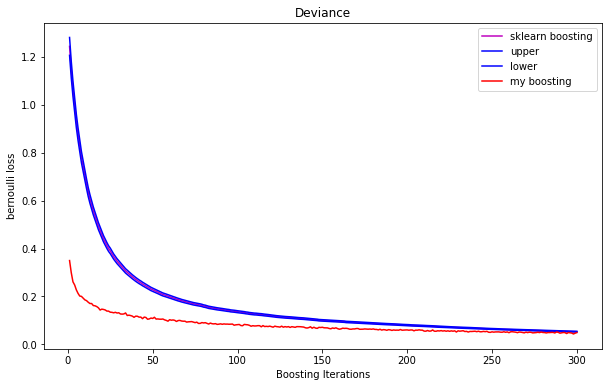

In [105]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.title('Deviance')
plt.plot(np.arange(N_ESTIMATORS) + 1, base_model.train_score_[:N_ESTIMATORS],
         'm-', label='sklearn boosting')
plt.plot(np.arange(N_ESTIMATORS) + 1, base_model.train_score_[:N_ESTIMATORS] * 1.03,
         'b-', label='upper bound')
plt.plot(np.arange(N_ESTIMATORS) + 1, base_model.train_score_[:N_ESTIMATORS] * 0.97,
         'b-', label='lower bound')
plt.plot(np.arange(N_ESTIMATORS) + 1, my_model.loss_by_iter[:N_ESTIMATORS], 'r-', label='my boosting')


plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('bernoulli loss')
plt.show()

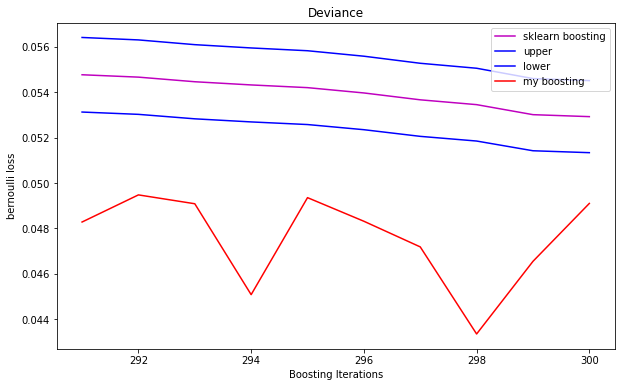

In [108]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.title('Deviance')
plt.plot(np.arange(N_ESTIMATORS-10,N_ESTIMATORS) + 1, base_model.train_score_[N_ESTIMATORS-10:N_ESTIMATORS],
         'm-', label='sklearn boosting')
plt.plot(np.arange(N_ESTIMATORS-10,N_ESTIMATORS) + 1, base_model.train_score_[N_ESTIMATORS-10:N_ESTIMATORS] * 1.03,
         'b-', label='upper')
plt.plot(np.arange(N_ESTIMATORS-10,N_ESTIMATORS) + 1, base_model.train_score_[N_ESTIMATORS-10:N_ESTIMATORS] * 0.97,
         'b-', label='lower')
plt.plot(np.arange(N_ESTIMATORS-10,N_ESTIMATORS) + 1,
         my_model.loss_by_iter[N_ESTIMATORS-10:N_ESTIMATORS], 'r-', label='my boosting')

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('bernoulli loss')
plt.show()